In [1]:
#Import Libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Add the 'src' folder to sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

#import previously created classes

from connections.db import PostgreSQLConnection
from utils.data_analysis_functions import DataAnalyzer

db_service = PostgreSQLConnection()

### **First Step:**
- Cargamos el dataset

In [2]:
# Remove the column display limit to show all columns in the DataFrame
pd.set_option('display.max_columns', None)

In [3]:
# Create a DataFrame from the Spotify staging table
spotify_data = db_service.create_dataframe('../sql/queries/select_all_rows.sql','spotify_staging')
spotify_data.head(5)

✓ DataFrame created successfully.


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit_column,danceability,energy,key_column,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can t Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## **Second Step:**
- Analizamos de manera general el dataset 


In [4]:
#rows and columns
print(spotify_data.shape)

(114000, 21)


In [5]:
#First we analyze numerical columns
selected_columns = ['energy', 'danceability', 'duration_ms', 'popularity','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
numerical_cols = spotify_data[selected_columns]
numerical_cols.shape

(114000, 11)

In [6]:
#Importamos la clase de DataAnalyzer para analizar los datos numericos
analyzer_statistic = DataAnalyzer(spotify_data)

In [7]:
statistics_numeric = analyzer_statistic.analyze_and_combine(selected_columns)
statistics_numeric

,Column Name,Data Type,Unique Values,Repeated Values,Missing Values,Number of Duplicates,count,mean,std,min,25%,50%,75%,max,Mode,Variance,Skewness,Kurtosis
0,acousticness,float64,3677,110323,0,110323,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996,1.00,1.100000e-01,0.73,-0.95
1,danceability,float64,1174,112826,0,112826,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985,0.65,3.000000e-02,-0.40,-0.18
2,duration_ms,int64,50697,63303,0,63303,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000,162897.00,1.151280e+10,11.20,354.95
3,energy,float64,2080,111920,0,111920,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000,0.88,6.000000e-02,-0.60,-0.53
4,instrumentalness,float64,3655,110345,0,110345,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000,0.00,1.000000e-01,1.73,1.27
5,liveness,float64,1722,112278,0,112278,114000.0,0.213553,0.190378,0.000,0.09800,0.132000,0.2730,1.000,0.11,4.000000e-02,2.11,4.38
6,loudness,float64,19480,94520,0,94520,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532,-5.66,2.529000e+01,-2.01,5.90
7,popularity,int64,101,113899,0,113899,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000,0.00,4.975200e+02,0.05,-0.93
8,speechiness,float64,1489,112511,0,112511,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965,0.03,1.000000e-02,4.65,28.82
9,tempo,float64,45653,68347,0,68347,114000.0,122.147837,29.978197,0.000,99.21875,122.017000,140.0710,243.372,0.00,8.986900e+02,0.23,-0.11


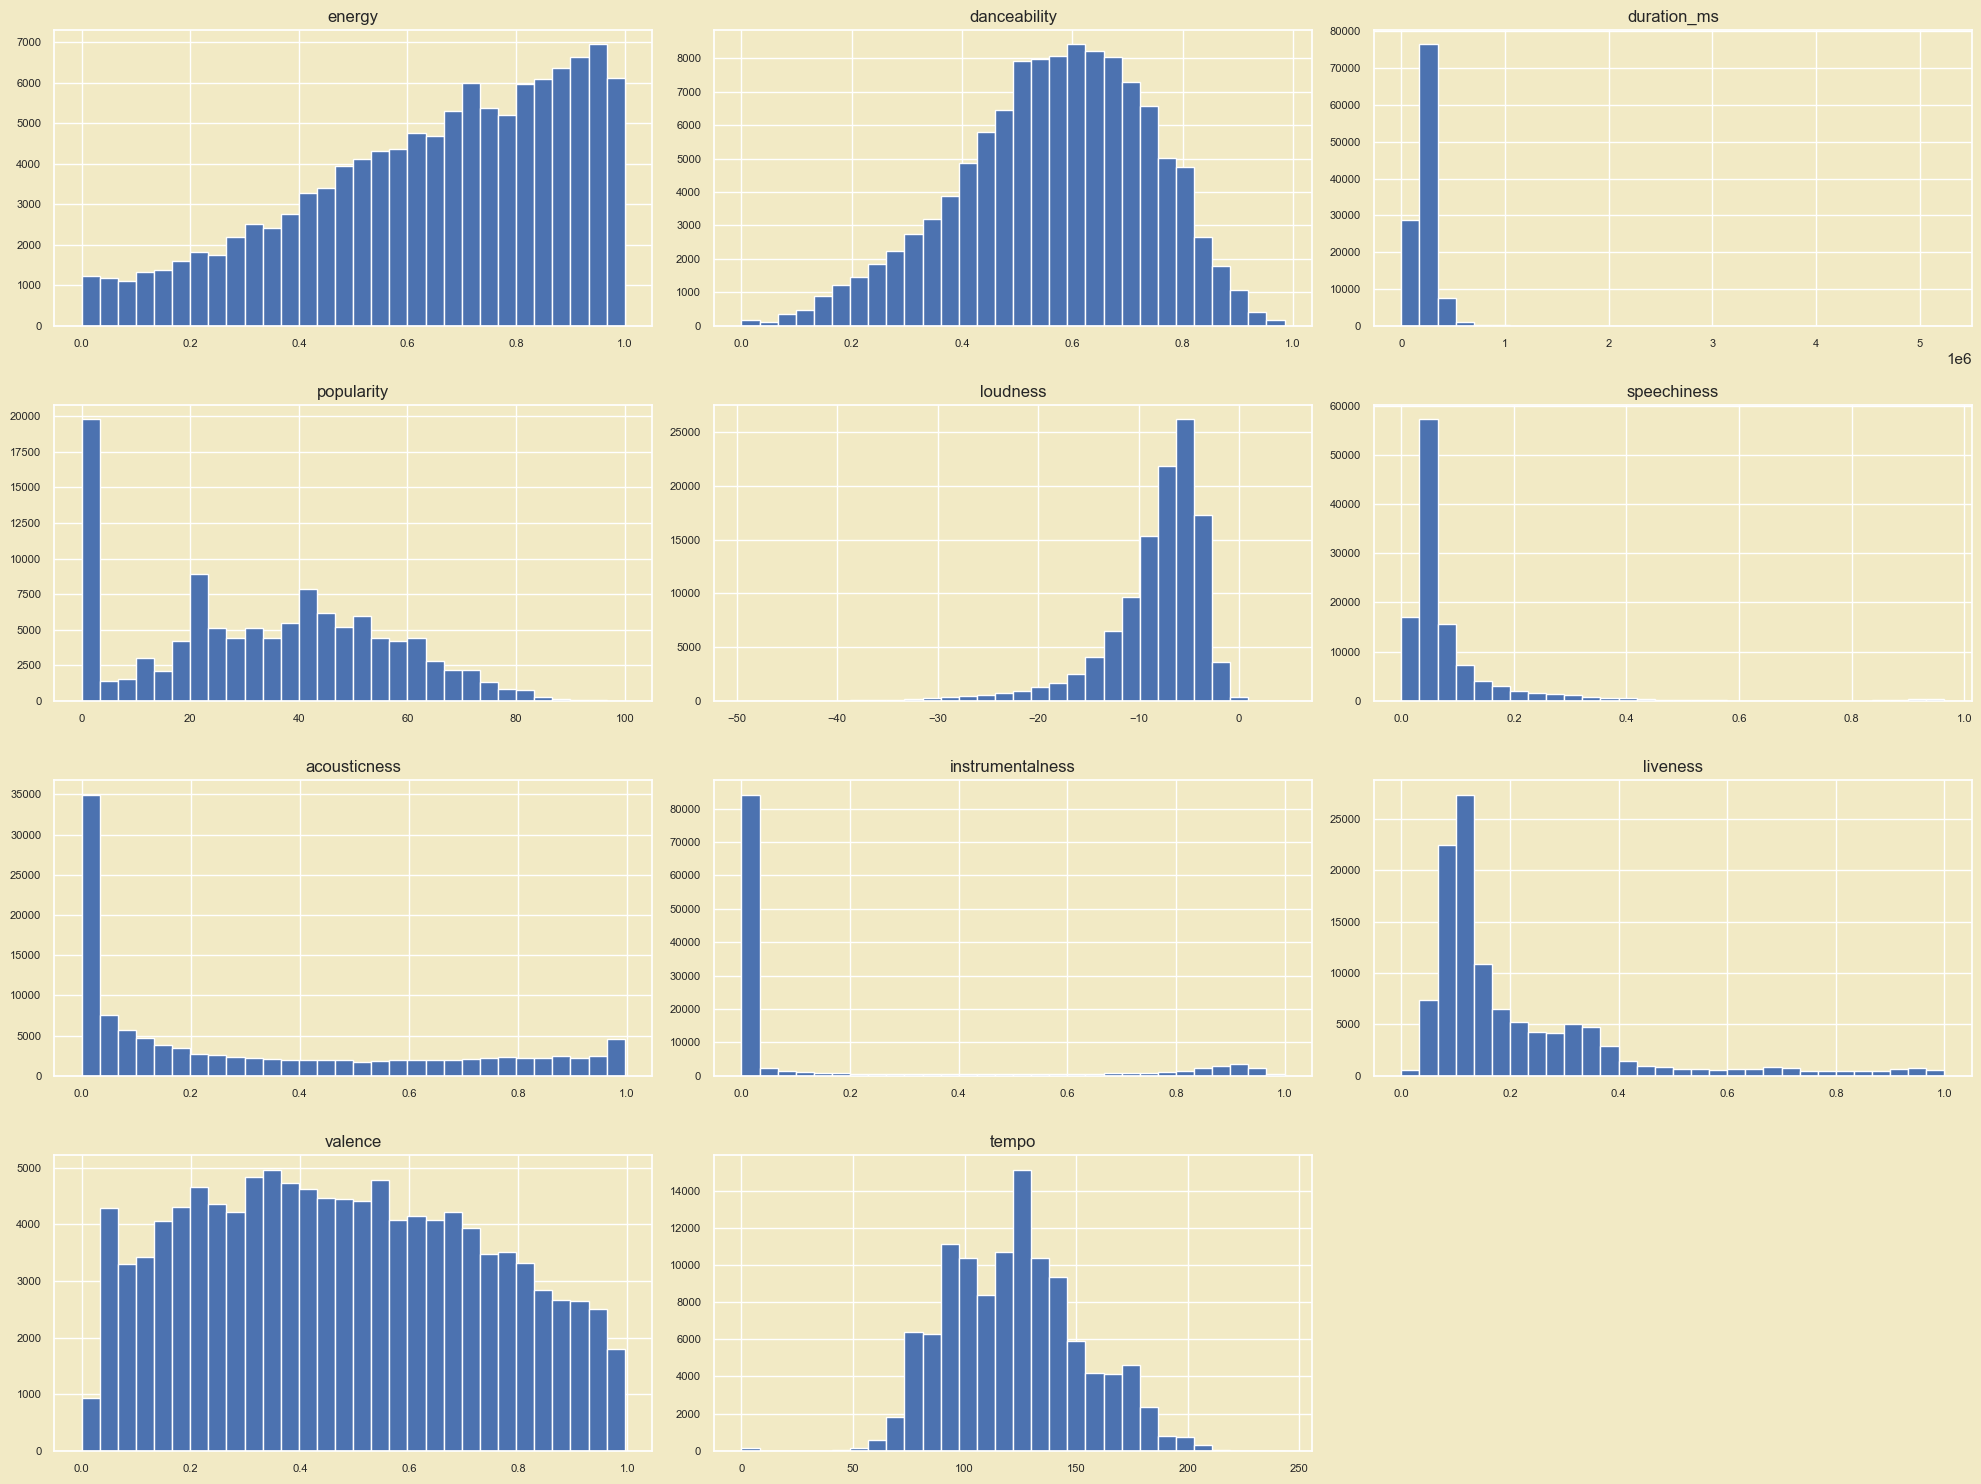

In [9]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

In [10]:
#Now we analyze categorical columns
categorical_cols = spotify_data[spotify_data.columns[(spotify_data.dtypes == 'object') | (spotify_data.dtypes == 'bool')]]
categorical_cols.shape

(114000, 6)

In [11]:
categorical_cols.head(5)

,track_id,artists,album_name,track_name,explicit_column,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,False,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,False,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson ZAYN,To Begin Again,To Begin Again,False,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can t Help Falling In Love,False,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,False,acoustic


In [12]:
categorical_cols.describe()

,track_id,artists,album_name,track_name,explicit_column,track_genre
count,114000,113999,113999,113999,114000,114000
unique,89741,31437,46589,73608,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,104253,1000


In [8]:
# Filtrar los registros que tienen al menos un valor nulo
spotify_data[spotify_data.isnull().any(axis=1)]


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit_column,danceability,energy,key_column,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65939,65900,1kR4gIb7nGxHPI3D2ifs59,None,None,None,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### **Third Step:**
- Analizamos columnas por columans

- **Unnamed_0**

In [13]:
unnamed_0 = spotify_data['Unnamed: 0'].sort_values()

In [14]:
unnamed_0.head(5)

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [15]:
# Verificar si todos los valores son enteros
are_integers = unnamed_0.dtype == 'int64'
print(f"Is 'Unnamed: 0' contain only integers?: {are_integers}")

Is 'Unnamed: 0' contain only integers?: True


In [16]:
# Ordenar la serie 'unnamed_0'
is_auto_incremental = (unnamed_0.diff().dropna() == 1).all()
print(f"Is 'Unnamed: 0' auto incremental?: {is_auto_incremental}")

Is 'Unnamed: 0' auto incremental?: True


In [17]:
# Verificar si todos los registros en 'unnamed_0' son diferentes
all_unique = unnamed_0.nunique() == len(unnamed_0)
print(f"Are all records in 'track_id' unique?: {all_unique}")

Are all records in 'track_id' unique?: True


- **track_id**

In [18]:
track_id = spotify_data['track_id']

In [19]:
track_id.head(5)

0    5SuOikwiRyPMVoIQDJUgSV
1    4qPNDBW1i3p13qLCt0Ki3A
2    1iJBSr7s7jYXzM8EGcbK5b
3    6lfxq3CG4xtTiEg7opyCyx
4    5vjLSffimiIP26QG5WcN2K
Name: track_id, dtype: object

In [20]:
#When reviewing the unique values of 'track_id' it can be seen that there are duplicate records. Therefore, 
# fetch all records with a random track_id to see what is going on
# Filter out records where the 'track_id' is equal to '6S3JlDAGk3uu3NtZbPnuhS'.

filtered_records = spotify_data[spotify_data['track_id'] == '6S3JlDAGk3uu3NtZbPnuhS']

# Print filtered records
filtered_records


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit_column,danceability,energy,key_column,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8324,8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues
19788,19759,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,country
34756,34728,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,folk
62270,62226,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-pop
63129,63087,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-rock
82088,82064,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,power-pop
84153,84129,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,psych-rock
99736,99727,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,singer-songwriter
102740,102732,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,songwriter


- **artists**

In [21]:
artist = spotify_data['artists']

In [22]:
artist.head(5)

0               Gen Hoshino
1              Ben Woodward
2    Ingrid Michaelson ZAYN
3              Kina Grannis
4          Chord Overstreet
Name: artists, dtype: object

In [23]:
# Count of unique records in 'artists' and this quantity
print(f"The count of unique artists in the dataset and their respective quantities are as follows:\n{artist.value_counts()}")

The count of unique artists in the dataset and their respective quantities are as follows:
artists
The Beatles                                 279
George Jones                                271
Stevie Wonder                               236
Linkin Park                                 224
Ella Fitzgerald                             222
                                           ... 
Hillsong Worship TAYA David Ware              1
Bethel Music Jenn Johnson Chris Quilala       1
Chris Tomlin Bear Rinehart NEEDTOBREATHE      1
Eddie Vedder Nusrat Fateh Ali Khan            1
Bethel Music Sydney Allen                     1
Name: count, Length: 31437, dtype: int64


- **album_name**

In [24]:
album_name = spotify_data['album_name']

In [25]:
album_name.head(5)

0                                               Comedy
1                                     Ghost (Acoustic)
2                                       To Begin Again
3    Crazy Rich Asians (Original Motion Picture Sou...
4                                              Hold On
Name: album_name, dtype: object

In [26]:
# Count of unique records in 'album_name' and this quantity
print(f"The count of unique albums in the dataset and their respective quantities are as follows:\n{album_name.value_counts()}")

The count of unique albums in the dataset and their respective quantities are as follows:
album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
                              ... 
A Greater Song (Live)            1
This is Thetahealing             1
Phenomena (DA DA) Remixes        1
What A Beautiful Name - EP       1
The Boy Who Never                1
Name: count, Length: 46589, dtype: int64


In [27]:
#verifying if the column 'album_name' has a diferent artist name

# Group by album and count the number of unique artists
albums_with_multiple_artists = spotify_data.groupby('album_name')['artists'].nunique()

# Filter those albums that have more than one artist
albums_with_different_artists = albums_with_multiple_artists[albums_with_multiple_artists > 1].index

# Get specific records of albums with different artists
different_artists_per_album = spotify_data[spotify_data['album_name'].isin(albums_with_different_artists)]

# Filter the specific album you're interested in, in this case "Hold On"
specific_album = different_artists_per_album[different_artists_per_album['album_name'] == 'Hold On']

# Show the records of the album "Hold On" with different artists
specific_album



,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit_column,danceability,energy,key_column,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.0526,0.469000,0.000000,0.0829,0.1670,119.949,4,acoustic
957,954,7qHPp1beQupJUzwRyVtoyy,Chord Overstreet,Hold On,Hold On,35,198853,False,0.609,0.443,2,-9.681,1,0.0546,0.469000,0.000000,0.0829,0.1660,119.967,4,acoustic
13826,13802,5KKyQmvhDblL9h24iMMDzC,Romanthony,Hold On,Hold On - Classic Vocal,5,385753,False,0.667,0.865,4,-5.116,1,0.3960,0.005690,0.000002,0.1010,0.4890,119.790,4,chicago-house
23705,23658,7hOXCmwRv1oDNWfxQrwZoy,Ali Bakgor biskuwi widerberg,Hold On,Hold On,41,183445,False,0.592,0.859,2,-8.768,0,0.0326,0.000158,0.914000,0.1120,0.0798,123.009,4,deep-house
46861,46805,5CCyKw0w72mueGAfyQecGK,Jakka-B,Hold On,Hold On,16,219636,False,0.396,0.632,3,-3.213,0,0.0369,0.079800,0.000000,0.0710,0.2270,164.784,4,happy
110818,110817,4ppG3XawSqo2b0qpq4E3vb,Armin van Buuren Davina Michelle,Hold On,Hold On,55,207727,False,0.603,0.738,7,-5.464,0,0.0646,0.037000,0.000002,0.1600,0.3270,132.047,4,trance


In [28]:
# Verifying if all track_id values are unique for each unique combination of album and artist
unique_combinations = spotify_data[['album_name', 'artists', 'track_id']].drop_duplicates()

# Check if all track_id values are unique within these combinations
are_all_track_ids_unique = unique_combinations['track_id'].nunique() == unique_combinations.shape[0]

# Print the result
print(f"Are all records in 'track_id' unique for each unique combination of album and artist?: {are_all_track_ids_unique}")

#Conclusions: Es diferentes discos debido a que el track_id es diferente lo que cambia es el ritmo del album o la version del album

Are all records in 'track_id' unique for each unique combination of album and artist?: True


- **track_name**

In [29]:
track_name = spotify_data['track_name']

In [30]:
track_name.head(5)

0                        Comedy
1              Ghost - Acoustic
2                To Begin Again
3    Can t Help Falling In Love
4                       Hold On
Name: track_name, dtype: object

In [31]:
# Count of unique records in 'track_name' and this quantity
print(f"The count of unique track names in the dataset and their respective quantities are as follows:\n{track_name.value_counts()}")

The count of unique track names in the dataset and their respective quantities are as follows:
track_name
Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 81
Little Saint Nick - 1991 Remix     76
Last Last                          75
                                 ... 
Encased in Ice                      1
Eu Quero É Que Se Foda              1
Hallelujah On My Knees - Live       1
Stay (You Are Good) - Live          1
Sueños Vividos                      1
Name: count, Length: 73608, dtype: int64


- **explicit_column**

In [32]:
explicit_column = spotify_data['explicit_column']

In [33]:
explicit_column.head(5)

0    False
1    False
2    False
3    False
4    False
Name: explicit_column, dtype: bool

In [34]:
#Count of unique records in 'explicit_column' and this quantity
print(f"The count of explicit_column names in the dataset and their respective quantities are as follows:\n{explicit_column.value_counts()}")

The count of explicit_column names in the dataset and their respective quantities are as follows:
explicit_column
False    104253
True       9747
Name: count, dtype: int64


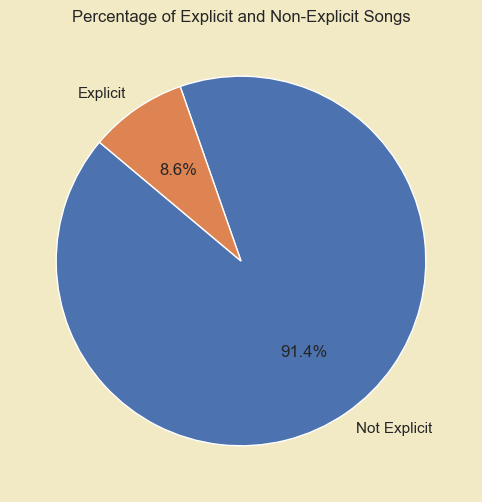

In [35]:
#create a pie_chart of the explicit_column column
plt.figure(figsize=(10, 6))
plt.pie(explicit_column.value_counts(), labels=['Not Explicit', 'Explicit'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Explicit and Non-Explicit Songs')
plt.show()